In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# 设置默认字体
plt.rcParams['font.sans-serif']=['Times New Roman'] 

In [3]:
# 读取一个shp 或者geojson文件
points = gpd.read_file(r'/Users/wl/Paper_First/202301Perception_Historical（大修）EI/github_upload/gis_data/point_2019-2013.shp')
points

,id,lng,lat,total_2019,total_2013,difference,geometry
0,1,121.490473,31.374709,0.780841,0.769064,0.011777,POINT (121.49047 31.37471)
1,2,121.490002,31.374475,0.731396,0.739170,-0.007773,POINT (121.49000 31.37448)
2,3,121.489531,31.374241,0.761905,0.743043,0.018862,POINT (121.48953 31.37424)
3,5,121.491411,31.375158,0.761313,0.757777,0.003536,POINT (121.49141 31.37516)
4,6,121.491881,31.375384,0.740033,0.768428,-0.028395,POINT (121.49188 31.37538)
...,...,...,...,...,...,...,...
33621,71518,121.499223,31.274106,0.721171,0.697510,0.023661,POINT (121.49922 31.27411)
33622,71519,121.498732,31.274078,0.675960,0.681712,-0.005751,POINT (121.49873 31.27408)
33623,71542,121.615493,31.210140,0.582641,0.455102,0.127539,POINT (121.61549 31.21014)
33624,71543,121.615177,31.210559,0.400329,0.399747,0.000581,POINT (121.61518 31.21056)


In [38]:
data_list = list(points['difference'])
data = np.array(data_list)
data

array([ 0.01177748, -0.00777325,  0.01886186, ...,  0.12753877,
        0.00058125,  0.0763605 ])

# Kolmogorov-Smirnov检验（K-S检验）：适用于任何尺寸的样本，特别是大样本。这个检验使用累积分布函数（CDF）的经验分布与理论分布（在这里是正态分布）进行比较。

In [25]:
import scipy.stats as stats
import numpy as np


# 确保所有数据都是正数
if np.any(data <= 0):
    # 将所有数据平移，使其大于0
    data += (-np.min(data) + 0.5)

# 计算数据的均值和标准差
mu = np.mean(data)
sigma = np.std(data, ddof=1)  # ddof=1 用于样本标准差

# 进行K-S检验，比较数据与正态分布的拟合程度
ks_statistic, p_value = stats.kstest(data, 'norm', args=(mu, sigma))

print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

# 根据P值判断
if p_value > 0.05:
    print("数据服从正态分布（在5%的显著性水平下）")
else:
    print("数据不服从正态分布（在5%的显著性水平下）")


KS Statistic: 0.07775913288049499
P-Value: 2.7600648723879566e-177
数据不服从正态分布（在5%的显著性水平下）


# 描述数据

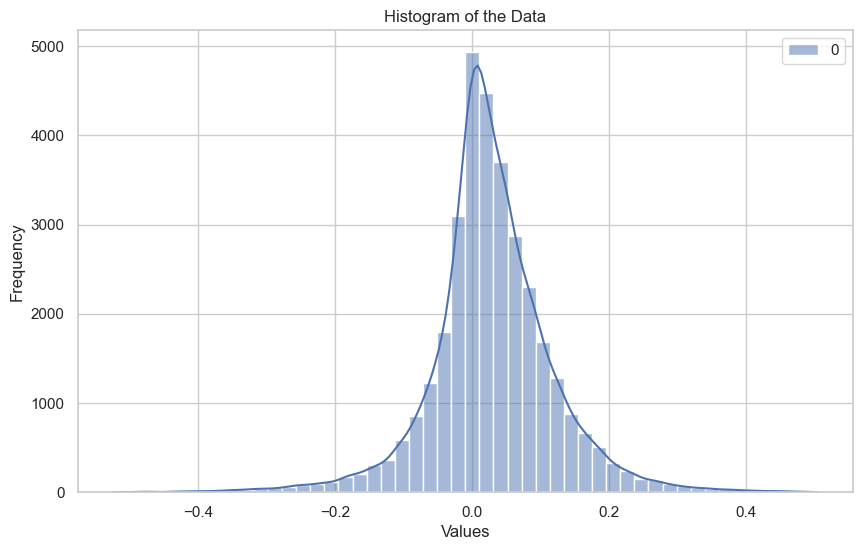

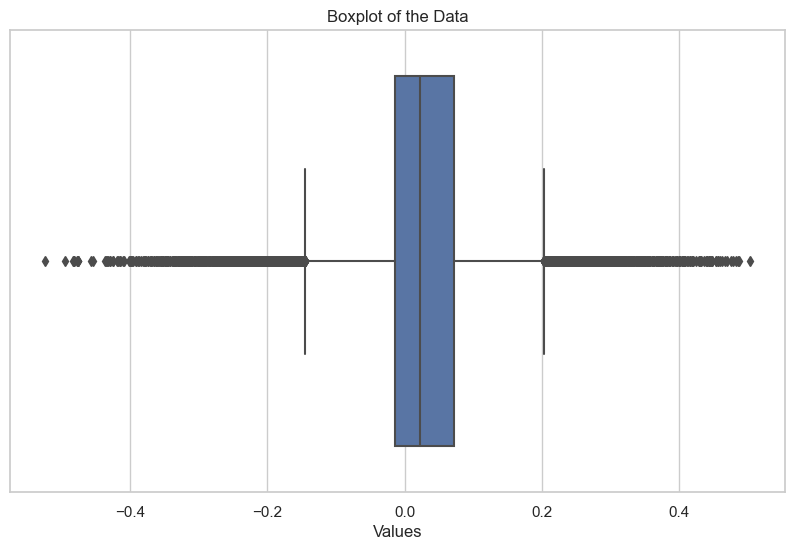

,0
count,33626.000000
mean,0.027891
std,0.089688
min,-0.524430
25%,-0.014295
50%,0.022343
75%,0.072842
max,0.503938


In [48]:
# 重命名列为 "values" 以简化处理
data = pd.DataFrame(data_list)

# 描述性统计
descriptive_stats = data.describe()

# 导入可视化库
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形风格
sns.set(style="whitegrid")

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=50, kde=True)
plt.title('Histogram of the Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[0])
plt.title('Boxplot of the Data')
plt.xlabel('Values')
plt.show()

descriptive_stats


# 进一步统计测试

In [50]:
import scipy.stats as stats

# 计算偏度和峰度
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

# Shapiro-Wilk 测试
shapiro_test = stats.shapiro(data.sample(5000))  # 由于性能考虑，抽样5000个样本进行测试

# D’Agostino’s K^2 测试
dagostino_test = stats.normaltest(data)

{
    "Skewness": skewness,
    "Kurtosis": kurtosis,
    "Shapiro-Wilk Test": shapiro_test,
    "D’Agostino’s K^2 Test": dagostino_test
}


{'Skewness': array([-0.0443494]),
 'Kurtosis': array([3.22221239]),
 'Shapiro-Wilk Test': ShapiroResult(statistic=0.9571585655212402, pvalue=5.136354277862752e-36),
 'D’Agostino’s K^2 Test': NormaltestResult(statistic=array([2548.26473713]), pvalue=array([0.]))}